In [1]:
import numpy as np
from plot_settings import *
import pandas as pd

# Scaling Model

$$\tau_{\mathrm{slow}} = D_{\mathrm{slow}}\bigg(\frac{\pi}{R}\bigg)^2 = D_{\mathrm{slow}}\bigg(\frac{2\pi}{\gamma L}\bigg)^2$$

where $R$ is the radius of the spherical volume

for 1D case (diffusion across the interface)

$$\tau = D_{\mathrm{slow}}\bigg(\frac{\pi}{\ell}\bigg)^2$$

where $\ell$ is the length of the interface

$R = \gamma L/2$

$$D_\mathrm{slow} = \frac{(\gamma L/2 \pi)^2}{t_1} = \frac{(\ell/\pi)^2}{t_2}$$
$$\frac{D_\mathrm{slow}}{(\gamma L/2 \pi)^2} = \frac{1}{t_1} = \frac{(\ell/\pi)^2}{t_2(\gamma L/2 \pi)^2}$$

$$\frac{470}{L^2} = \frac{(\ell/\pi)^2}{t_2(\gamma L/2 \pi)^2}$$

$$\frac{1}{t_2} = \frac{470(\gamma/2)^2}{\ell^2}$$

## critical radius

$$\lambda^* = \frac{470}{(R^*)^2}\frac{\gamma^2}{4}$$

# Simulation result summary

In [2]:
simlulation_data = [
    [2048, 1.0e-3, 0],
    [2048, 1.0e-4, 0],
    [2048, 1.0e-5, 0],
    [2048, 1.0e-6, 0],
    [2048, 1.0e-7, 0],
    [2048, 1.0e-8, 0],
    [4096, 1.0e-3, 0],
    [4096, 1.0e-4, 0],
    [4096, 1.0e-5, 0],
    [4096, 1.0e-6, 0],
    [4096, 1.0e-7, 0],
    [4096, 1.0e-8, 0],
    [8192, 1.0e-3, 4],
    [8192, 1.0e-4, 1],
    [8192, 1.0e-5, 0],
    [8192, 1.0e-6, 0],
    [8192, 1.0e-7, 0],
    [8192, 1.0e-8, 0],
    [16384, 1.0e-3, 8],
    [16384, 1.0e-4, 5],
    [16384, 1.0e-5, 2],
    [16384, 1.0e-6, 0],
    [16384, 1.0e-7, 0],
    [16384, 1.0e-8, 0],
    [32768, 1.0e-3, 100],       # 100 is place holder
    [32768, 1.0e-4, 11],
    [32768, 1.0e-5, 8],
    [32768, 1.0e-6, 2],
    [32768, 1.0e-7, 0],
    [32768, 1.0e-8, 0],
    [65536, 1.0e-3, 100],       # 100 is place holder
    [65536, 1.0e-4, 18],
    [65536, 1.0e-5, 17],
    [65536, 1.0e-6, 12],
    [65536, 1.0e-7, 2],
    [65536, 1.0e-8, 0]]
    
# Create the pandas DataFrame
sim_df = pd.DataFrame(simlulation_data, columns=['L', 'r', 'Nvac'])     # domain length, rate, number of vacuoles

# Simulation Parameters and Scales

In [3]:
D_slow = 0.0352223      # calculated for dense phase composition at pH 8; from Kyles Mathematica notebook
rate_num = 470          # from paper  470/L^2

gamma = 0.0957068           # inital volume fraction of drop     
gamma_f = 0.0544024         # final volume fraction of drop     
lambda_star = 1.26*1e-5     # spinodal rate at elbow, NEW VALUE, ; from Kyles Mathematica notebook

char_length = 10    # interface lengthscale
# char_rate = (gamma_f/2)**2*rate_num/char_length**2        # derived above
char_rate = D_slow*(np.pi/char_length)**2                   # same as above \pi/L
print(char_rate,(gamma_f/2)**2*rate_num/char_length**2)

R_star = gamma/2*np.sqrt(rate_num/lambda_star)
print(R_star)

0.0034763016709648967 0.003477554822768
292.2647621474595


In [4]:
D_slow/(gamma_f/2/np.pi)**2, rate_num

(469.8306334831583, 470)

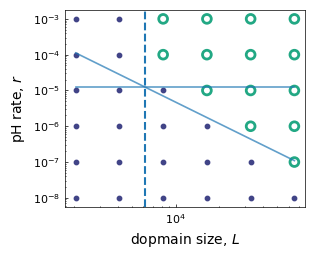

In [5]:
fig, ax = plt.subplots()

## sizing & plot parameters 
cm = 2.54
width = (7+4) / cm # in
height = (5+4) / cm # in
fig.set_size_inches(width, height)
ax.set_position([2/9,2/9,5/9,5/9])

idx = sim_df['Nvac']>0
plt.scatter(sim_df['L'][idx], sim_df['r'][idx], s=40, 
           facecolors='none', edgecolors=cmap(0.6), linewidths=2,
           label='vacuoles')

idx = sim_df['Nvac']==0
plt.scatter(sim_df['L'][idx], sim_df['r'][idx], s=10, color=cmap(0.2),
            label='No vacuoles')

plt.plot(sim_df['L'].unique(), rate_num/(sim_df['L'].unique())**2, linestyle='-', color='tab:blue', alpha=0.7, linewidth=1.2)
plt.plot(sim_df['L'].unique(), lambda_star*np.ones_like(sim_df['L'].unique()), linestyle='-', color='tab:blue', alpha=0.7, linewidth=1.2)
plt.axvline((rate_num/lambda_star)**0.5, linestyle='--',color='tab:blue')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'pH rate, $r$', fontsize=10)
plt.xlabel(r'dopmain size, $L$', fontsize=10)

ax.tick_params(axis='x', which='minor', bottom=True)
#plt.xticks([100,200,400,800,1600,3200],[100,200,400,800,1600,3200])
#plt.yticks([1e-8,1e-7, 1e-6,1e-5,1e-4,1e-3],['$10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$'])

ax.tick_params(direction="in", length=2, width = 0.5)
ax.tick_params(direction="in", length=1, width = 0.5, which='minor')
ax.tick_params(axis='both', which='major', labelsize=8)

# plt.savefig('Fig 4 model phase space.svg', format='svg')
# plt.savefig('Fig 4 model phase space.pdf', format='pdf')
# plt.savefig('Fig 4 model phase space.png', format='png')


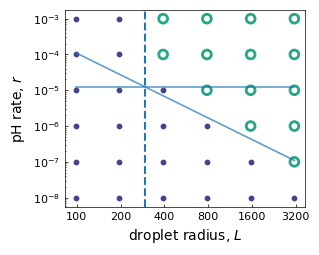

In [6]:
fig, ax = plt.subplots()

## sizing & plot parameters 
cm = 2.54
width = (7+4) / cm # in
height = (5+4) / cm # in
fig.set_size_inches(width, height)
ax.set_position([2/9,2/9,5/9,5/9])

idx = sim_df['Nvac']>0
plt.scatter(sim_df['L'][idx]*gamma/2, sim_df['r'][idx], s=40, 
           facecolors='none', edgecolors=cmap(0.6), linewidths=2,
           label='vacuoles')

idx = sim_df['Nvac']==0
plt.scatter(sim_df['L'][idx]*gamma/2, sim_df['r'][idx], s=10, color=cmap(0.2),
            label='No vacuoles')

plt.plot(sim_df['L'].unique()*gamma/2, rate_num/(sim_df['L'].unique())**2, linestyle='-', color='tab:blue', alpha=0.7, linewidth=1.2)
plt.plot(sim_df['L'].unique()*gamma/2, lambda_star*np.ones_like(sim_df['L'].unique()), linestyle='-', color='tab:blue', alpha=0.7, linewidth=1.2)
plt.axvline(R_star, linestyle='--',color='tab:blue')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'pH rate, $r$', fontsize=10)
# plt.xlabel(r'droplet radius, $R_{\mathrm{drop}}$', fontsize=10)
plt.xlabel(r'droplet radius, $L$', fontsize=10)

ax.tick_params(axis='x', which='minor', bottom=False)
plt.xticks([100,200,400,800,1600,3200],[100,200,400,800,1600,3200])
plt.yticks([1e-8,1e-7, 1e-6,1e-5,1e-4,1e-3],['$10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$'])

ax.tick_params(direction="in", length=2, width = 0.5)
ax.tick_params(direction="in", length=1, width = 0.5, which='minor')
ax.tick_params(axis='both', which='major', labelsize=8)



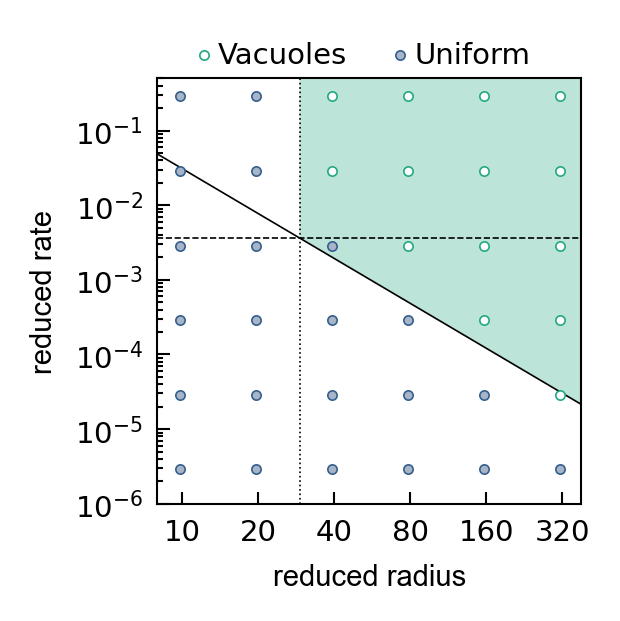

In [28]:

fixed_width = 2
tentative_height = 2.034

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

idx = sim_df['Nvac']>0
plt.scatter(sim_df['L'][idx]*gamma/2/char_length, sim_df['r'][idx]/char_rate, s=5, 
           facecolors='white', edgecolors=cmap(0.6), linewidths=0.4,
           label='Vacuoles', zorder=5)

face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)
edge_color_no_vacuole = cmap(0.3)  

idx = sim_df['Nvac']==0
plt.scatter(sim_df['L'][idx]*gamma/2/char_length, sim_df['r'][idx]/char_rate, s=5, 
            facecolor=face_color_no_vacuole, edgecolor=edge_color_no_vacuole, linewidth=0.4,
            label='Uniform', zorder=5)

xmin, xmax = [8,380]
ymin, ymax = [1e-6,5e-1]


# # Settings for solid lines around the vacuole forming region
# # x = sim_df['L'].unique()*gamma/2
# x = np.linspace(xmin,R_star/char_length,200)*char_length
# y = 1/4*rate_num/x**2*gamma**2
# plt.plot(x/char_length,y/char_rate, linestyle='--', color='k', linewidth=0.4)
# x = np.linspace(R_star/char_length,xmax,200)*char_length
# y = 1/4*rate_num/x**2*gamma**2
# plt.fill_between(x/char_length, y/char_rate, ymax*np.ones_like(x), color=cmap(0.6), zorder=0, alpha=0.3, edgecolor='None')
# plt.plot(x/char_length,y/char_rate, linestyle='-', color='k', linewidth=0.4)
# plt.axhline(y=lambda_star/char_rate, linestyle='--', color='k', linewidth=0.4)
# # plt.axvline(gamma*np.sqrt(470/lambda_star)/2/char_length, linestyle='-',color='k', linewidth=0.4)
# plt.plot(np.array([R_star,R_star])/char_length, np.array([ymin*char_rate ,lambda_star])/char_rate, linestyle='--',color='k', linewidth=0.4)
# plt.plot(np.array([R_star,R_star])/char_length, np.array([lambda_star,ymax*char_rate ])/char_rate, linestyle='-',color='k', linewidth=0.4)

plt.axhline(y=lambda_star/char_rate, linestyle='--', color='k', linewidth=0.4)
plt.axvline(x=R_star/char_length, linestyle=':', color='k', linewidth=0.4)
x = np.linspace(xmin,xmax,200)*char_length
y = 1/4*rate_num/x**2*gamma**2
plt.plot(x/char_length,y/char_rate, linestyle='-', color='k', linewidth=0.4)
x = np.linspace(R_star/char_length,xmax,200)*char_length
y = 1/4*rate_num/x**2*gamma**2
plt.fill_between(x/char_length, y/char_rate, ymax*np.ones_like(x), color=cmap(0.6), zorder=0, alpha=0.3, edgecolor='None')

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

plt.legend(
    fontsize=7,
    ncol=2,                     # put entries in one row
    loc='upper center',         # place legend centered above plot
    bbox_to_anchor=(0.46, 1.15),  # adjust vertical placement as needed
    frameon=False,
    handletextpad=-0.5,    # Reduce space between legend markers and labels
    columnspacing=0.8,    # Reduce space between legend columns
    labelspacing=0.1
)

ax.tick_params(labelsize=7)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('reduced rate', fontsize=7, fontname="Arial")
plt.xlabel('reduced radius', fontsize=7, fontname="Arial")
ax.tick_params(which='both', direction="in")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.xticks([10,20,40,80,160,320],[10,20,40,80,160,320])
plt.yticks([1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])

plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/Fig 4 model phase space v2.svg', format='svg')
plt.savefig('Plots/Fig 4 model phase space v2.pdf', format='pdf')
plt.savefig('Plots/Fig 4 model phase space v2.png', format='png')


In [29]:
# Important parameters

reference_pH = 8.5      # used for the calculation of radius and rates
min_radius = 3.4        # minimum droplet size used in the analysis
target_pH = 7.5         # droplets which don't form vacuoles are tracked till this pH

droplets_all = pd.read_csv('trajectory_characterization.csv')
experiments = ['23.11.14-15', '23.12.22-23', '24.04.01', '24.07.08']
asym_expt = ['24.11.09', '24.11.14']
droplets = droplets_all[droplets_all['experiment'].isin(experiments)]

particles_to_keep = droplets[(droplets['radius'] > min_radius) & droplets['consider_drop']==1]['particle'].unique()
filtered_drops = droplets[droplets['particle'].isin(particles_to_keep)].copy()


In [30]:
###########
# SCALES
###########
length_scale = 10e-9        # interface length 10nm
frap_time = 12              # minutes
frap_length = 2*1e-6        # radius 2 microns

D_exp = (frap_length/np.pi)**2/frap_time        #\pi/R
char_rate_exp = D_exp*(np.pi/length_scale)**2      # \pi/L; min-1

char_rate_exp, D_exp

(3333.333333333332, 3.377372788077925e-14)

In [31]:
class Labeloffset():
    def __init__(self,  ax, label="", axis="y"):
        self.axis = {"y":ax.yaxis, "x":ax.xaxis}[axis]
        self.label=label
        ax.callbacks.connect(axis+'lim_changed', self.update)
        ax.figure.canvas.draw()
        self.update(None)

    def update(self, lim):
        fmt = self.axis.get_major_formatter()
        self.axis.offsetText.set_visible(False)
        self.axis.set_label_text(self.label + " "+ fmt.get_offset() )

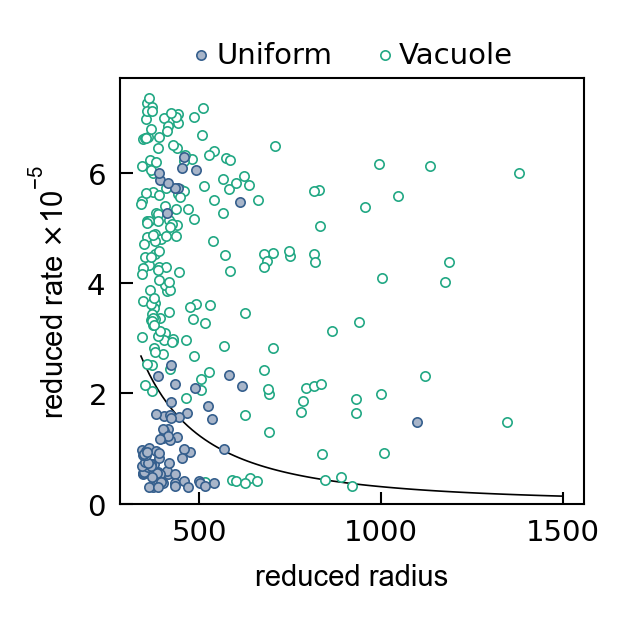

In [32]:

df_plot = filtered_drops.dropna(subset=['particle', 'rate(dpHdt)', 'radius'])
df_plot = df_plot[df_plot['experiment'].isin(experiments)]

fixed_width = 2
tentative_height = 2.034

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

# Create face color & edge color (RGBA), face color has alpha=0.7
# e.g. cmap(0.3) returns an RGBA tuple. We'll manually update the alpha.
face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha = 0.7
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)

edge_color_no_vacuole = cmap(0.3)  # Remains fully opaque

reduced_radius = df_plot[df_plot['vacuole'] == 0]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 0]['rate(dpHdt)']*60/char_rate_exp 

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor=face_color_no_vacuole,
    edgecolor=edge_color_no_vacuole,
    label='Uniform',
    linewidths=0.4,
    s=5,
    zorder=2
)

# Repeat for vacuole=1 with a different color index, e.g. cmap(0.6)
face_color_vacuole = list(cmap(0.6))
face_color_vacuole[3] = 0.7  # Face alpha = 0.7
face_color_vacuole = tuple(face_color_vacuole)

edge_color_vacuole = cmap(0.6)  # fully opaque edges

reduced_radius = df_plot[df_plot['vacuole'] == 1]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 1]['rate(dpHdt)']*60/char_rate_exp 

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor='white',
    edgecolor=edge_color_vacuole,
    label='Vacuole',
    linewidths=0.4,
    s=5,
    zorder=1
)

ax.set_xlabel(r'reduced radius', fontsize=7, fontname="Arial")
ax.set_ylabel(r'reduced rate', fontsize=7, fontname="Arial")

ax.tick_params(labelsize=7, direction='in')
ax.set_ylim(bottom=0)

plt.legend(
    fontsize=7,
    ncol=2,                     # put entries in one row
    loc='upper center',         # place legend centered above plot
    bbox_to_anchor=(0.48, 1.15),  # adjust vertical placement as needed
    frameon=False,
    handletextpad=-0.5,    # Reduce space between legend markers and labels
    columnspacing=0.8,    # Reduce space between legend columns
    labelspacing=0.1
)

xx = np.linspace(340,1500,100)      # reduced radius
# y = 1/4*rate_num/x**2*gamma**2    # equation of line, x is not in reduced radius
yy = (1/4*rate_num/(xx*char_length)**2*gamma**2)/(char_rate)
plt.plot(xx,yy, linestyle='-', color='k', linewidth=0.4, zorder=0)

import matplotlib.ticker as ticker

# Force scientific notation and use math text, so the offset is in the same style:
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# Manually set the font properties of the offset text to match the tick labels:
offset_text = ax.yaxis.get_offset_text()
offset_text.set_fontsize(7)
offset_text.set_fontname("Arial")

plt.tight_layout(pad=0.5)

lo = Labeloffset(ax, label="reduced rate", axis="y")

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)

plt.savefig('Plots/Fig 4 exp phase space.svg', format='svg')
plt.savefig('Plots/Fig 4 exp phase space.pdf', format='pdf')
plt.savefig('Plots/Fig 4 exp phase space.png', format='png')


In [41]:
from matplotlib.lines import Line2D

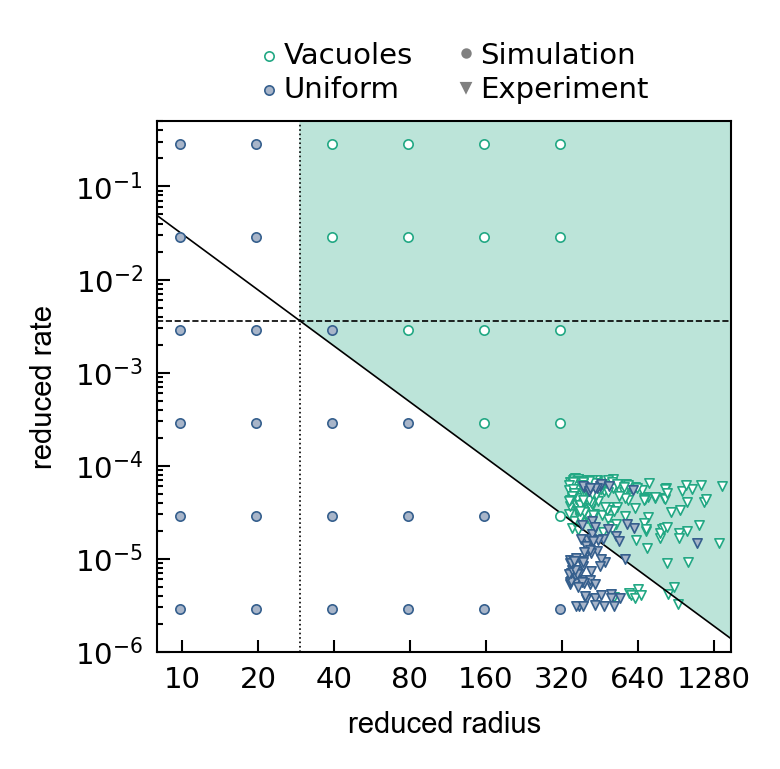

In [66]:

fixed_width = 2.54
tentative_height = 2.54

cmap = plt.cm.viridis

fig, ax = plt.subplots(figsize=(fixed_width, tentative_height), dpi=300)

idx = sim_df['Nvac']>0
plt.scatter(sim_df['L'][idx]*gamma/2/char_length, sim_df['r'][idx]/char_rate, s=5, 
           facecolors='white', edgecolors=cmap(0.6), linewidths=0.4,
           label='Vacuoles', zorder=5)

face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)
edge_color_no_vacuole = cmap(0.3)  

idx = sim_df['Nvac']==0
plt.scatter(sim_df['L'][idx]*gamma/2/char_length, sim_df['r'][idx]/char_rate, s=5, 
            facecolor=face_color_no_vacuole, edgecolor=edge_color_no_vacuole, linewidth=0.4,
            label='Uniform', zorder=5)

xmin, xmax = [8,1500]
ymin, ymax = [1e-6,5e-1]


# # Settings for solid lines around the vacuole forming region
# # x = sim_df['L'].unique()*gamma/2
# x = np.linspace(xmin,R_star/char_length,200)*char_length
# y = 1/4*rate_num/x**2*gamma**2
# plt.plot(x/char_length,y/char_rate, linestyle='--', color='k', linewidth=0.4)
# x = np.linspace(R_star/char_length,xmax,200)*char_length
# y = 1/4*rate_num/x**2*gamma**2
# plt.fill_between(x/char_length, y/char_rate, ymax*np.ones_like(x), color=cmap(0.6), zorder=0, alpha=0.3, edgecolor='None')
# plt.plot(x/char_length,y/char_rate, linestyle='-', color='k', linewidth=0.4)
# plt.axhline(y=lambda_star/char_rate, linestyle='--', color='k', linewidth=0.4)
# # plt.axvline(gamma*np.sqrt(470/lambda_star)/2/char_length, linestyle='-',color='k', linewidth=0.4)
# plt.plot(np.array([R_star,R_star])/char_length, np.array([ymin*char_rate ,lambda_star])/char_rate, linestyle='--',color='k', linewidth=0.4)
# plt.plot(np.array([R_star,R_star])/char_length, np.array([lambda_star,ymax*char_rate ])/char_rate, linestyle='-',color='k', linewidth=0.4)

plt.axhline(y=lambda_star/char_rate, linestyle='--', color='k', linewidth=0.4)
plt.axvline(x=R_star/char_length, linestyle=':', color='k', linewidth=0.4)
x = np.linspace(xmin,xmax,200)*char_length
y = 1/4*rate_num/x**2*gamma**2
plt.plot(x/char_length,y/char_rate, linestyle='-', color='k', linewidth=0.4)
x = np.linspace(R_star/char_length,xmax,200)*char_length
y = 1/4*rate_num/x**2*gamma**2
plt.fill_between(x/char_length, y/char_rate, ymax*np.ones_like(x), color=cmap(0.6), zorder=0, alpha=0.3, edgecolor='None')

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


legend1 = plt.legend(
    fontsize=7,
    ncol=2,                     # put entries in one row
    loc='upper center',         # place legend centered above plot
    bbox_to_anchor=(0.46, 1.5),  # adjust vertical placement as needed
    frameon=False,
    handletextpad=-0.5,    # Reduce space between legend markers and labels
    columnspacing=0.8,    # Reduce space between legend columns
    labelspacing=0.1
)

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Example handles from your plot (replace with your actual plot handles)
plot_handles, labels = plt.gca().get_legend_handles_labels()

# Marker explanation handles
marker_handles = [
    Line2D([0], [0], marker='o', color='gray', linestyle='None', label='Simulation', markersize=1.5),
    Line2D([0], [0], marker='v', color='gray', linestyle='None', label='Experiment', markersize=1.5),
]

# Combine all handles and labels
all_handles = plot_handles + marker_handles

# Create a 2x2 grid legend
plt.legend(
    handles=all_handles,
    fontsize=7,
    ncol=2,  # 2 columns => 4 items form 2 rows
    loc='upper center',
    bbox_to_anchor=(0.5, 1.2),
    frameon=False,
    handletextpad=-0.5,
    columnspacing=0.8,
    labelspacing=0.2
)


ax.tick_params(labelsize=7)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('reduced rate', fontsize=7, fontname="Arial")
plt.xlabel('reduced radius', fontsize=7, fontname="Arial")
ax.tick_params(which='both', direction="in")
ax.tick_params(axis='x', which='minor', bottom=False)
plt.xticks([10,20,40,80,160,320,640, 1280],[10,20,40,80,160,320,640, 1280])
plt.yticks([1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])

plt.tight_layout(pad=0.5)

current_width, current_height = fig.get_size_inches()
scaling_factor = fixed_width/current_width
fig.set_size_inches(fixed_width, current_height*scaling_factor)


# Experimental Data


# Create face color & edge color (RGBA), face color has alpha=0.7
# e.g. cmap(0.3) returns an RGBA tuple. We'll manually update the alpha.
face_color_no_vacuole = list(cmap(0.3))
face_color_no_vacuole[3] = 1  # Face alpha = 0.7
face_color_no_vacuole[0] = 0.66
face_color_no_vacuole[1] = 0.71
face_color_no_vacuole[2] = 0.79
face_color_no_vacuole = tuple(face_color_no_vacuole)

edge_color_no_vacuole = cmap(0.3)  # Remains fully opaque

reduced_radius = df_plot[df_plot['vacuole'] == 0]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 0]['rate(dpHdt)']*60/char_rate_exp 

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor=face_color_no_vacuole,
    edgecolor=edge_color_no_vacuole,
    label='Uniform',
    linewidths=0.4,
    s=5,
    zorder=2,
    marker='v'
)

# Repeat for vacuole=1 with a different color index, e.g. cmap(0.6)
face_color_vacuole = list(cmap(0.6))
face_color_vacuole[3] = 0.7  # Face alpha = 0.7
face_color_vacuole = tuple(face_color_vacuole)

edge_color_vacuole = cmap(0.6)  # fully opaque edges

reduced_radius = df_plot[df_plot['vacuole'] == 1]['radius']*1e-6/length_scale
reduced_rate = -df_plot[df_plot['vacuole'] == 1]['rate(dpHdt)']*60/char_rate_exp 

ax.scatter(
    reduced_radius,
    reduced_rate,
    facecolor='white',
    edgecolor=edge_color_vacuole,
    label='Vacuole',
    linewidths=0.4,
    s=5,
    zorder=1,
    marker='v'
)

plt.savefig('Plots/SI comparison.svg', format='svg')
plt.savefig('Plots/SI comparison.pdf', format='pdf')
plt.savefig('Plots/SI comparison.png', format='png')
